In [1]:
import os
import random
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import TensorDataset

from models.DDPM_Schedule import DDPM, DDPMTopology
from models.unet import ContextUnet, ContextUnetGraph

from utils import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [2]:
# Set a fixed random seed for reproducibility across multiple libraries
random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)

# Check for CUDA (GPU support) and set device accordingly
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available.")
    torch.cuda.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)  # For multi-GPU setups
    # Additional settings for ensuring reproducibility on CUDA
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # !nvidia-smi
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print("MPS is available.")
else:
    device = torch.device("cpu")
    print("CUDA not available.")

print("Using", device)

CUDA is available.
Using cuda


In [3]:
lr_data_path_train = 'data/lr_train.csv'
lr_data_path_test = 'data/lr_test.csv'
hr_data_path = 'data/hr_train.csv'

# load data
df_lr_train = pd.read_csv(lr_data_path_train)
df_lr_test = pd.read_csv(lr_data_path_test)
df_hr_train = pd.read_csv(hr_data_path)

lr_matrices = vectorize_matrix(df_lr_train, 160)
hr_matrices = vectorize_matrix(df_hr_train, 268)
test_matrices = vectorize_matrix(df_lr_test, 160)

hr_all = np.mean(hr_matrices, axis=0, keepdims=True).squeeze()
patch_size_lr = 20
lr_matrices_matched = []

for lr_mat in lr_matrices:
    lr_matrices_matched.append(patch_histogram_matching(lr_mat, hr_all, patch_size_lr, nbins=256))
lr_matrices = np.array(lr_matrices_matched)

lr_matrices_matched = []
for lr_mat in test_matrices:
    lr_matrices_matched.append(patch_histogram_matching(lr_mat, hr_all, patch_size_lr, nbins=256))
test_matrices = np.array(lr_matrices_matched)
test_lr_tensors = torch.stack([torch.FloatTensor(x) for x in test_matrices]).to(device)

# lr_matrices = np.concatenate([lr_matrices, augmented_lr_matrices], axis=0)
# hr_matrices.extend(hr_matrices)
# convert data to tensors
lr_tensors = torch.stack([torch.FloatTensor(x) for x in lr_matrices]).to(device)
hr_tensors = torch.stack([torch.FloatTensor(x) for x in hr_matrices]).to(device)

# needed dimension to use ddpm
hr_tensors = hr_tensors.unsqueeze(1)

dataset = TensorDataset(lr_tensors, hr_tensors)

In [4]:
patience = 5
n_epoch = 50
n_feat = 32
lr = 1e-3

# SOTA
DDPM_model = DDPM
unet_model = ContextUnet

save = DDPM_model.__name__
# save = None

Fold 1:
Denoiser model total trainable parameters: 21057409


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0, train_loss: 0.8324, val_loss: 0.3780
Epoch 1, train_loss: 0.3672, val_loss: 0.3219
Epoch 2, train_loss: 0.3131, val_loss: 0.2709
Epoch 3, train_loss: 0.3036, val_loss: 0.2636
Epoch 4, train_loss: 0.2694, val_loss: 0.2603
Epoch 5, train_loss: 0.2375, val_loss: 0.2499
Epoch 6, train_loss: 0.2591, val_loss: 0.2865
Epoch 7, train_loss: 0.2179, val_loss: 0.2061
Epoch 8, train_loss: 0.2272, val_loss: 0.2962
Epoch 9, train_loss: 0.2496, val_loss: 0.2076
Epoch 10, train_loss: 0.2786, val_loss: 0.2034
Epoch 11, train_loss: 0.2498, val_loss: 0.2222
Epoch 12, train_loss: 0.2958, val_loss: 0.1878
Epoch 13, train_loss: 0.2408, val_loss: 0.2665
Epoch 14, train_loss: 0.2231, val_loss: 0.2655
Epoch 15, train_loss: 0.2163, val_loss: 0.2496
Epoch 16, train_loss: 0.2528, val_loss: 0.2031
Epoch 17, train_loss: 0.2611, val_loss: 0.2381
Early stopping triggered after 17 epochs.



100%|██████████| 100/100 [00:16<00:00,  6.08it/s]


100%|██████████| 100/100 [00:10<00:00,  9.80it/s]


Processing samples:   0%|          | 0/56 [00:00<?, ?it/s]

Overall MAE: 0.230615496635437
Pearson Correlation Coefficient (PCC): 0.010643744
Jensen-Shannon Distance: 0.493136595914817
Average MAE Betweenness Centrality: 0.020617196365293338
Average MAE Eigenvector Centrality: 0.01770835911998275
Average MAE PageRank Centrality: 0.000749024485650547
Average Clustering MAE: 0.08111322337345274
Average Degree MAE: 0.39275586353944564


  0%|          | 0/112 [00:00<?, ?it/s]

















































































































torch.Size([1, 1, 268, 268])
Generated 112 predictions
Creating File at results/DDPM/predictions_fold_1.csv...
Done!


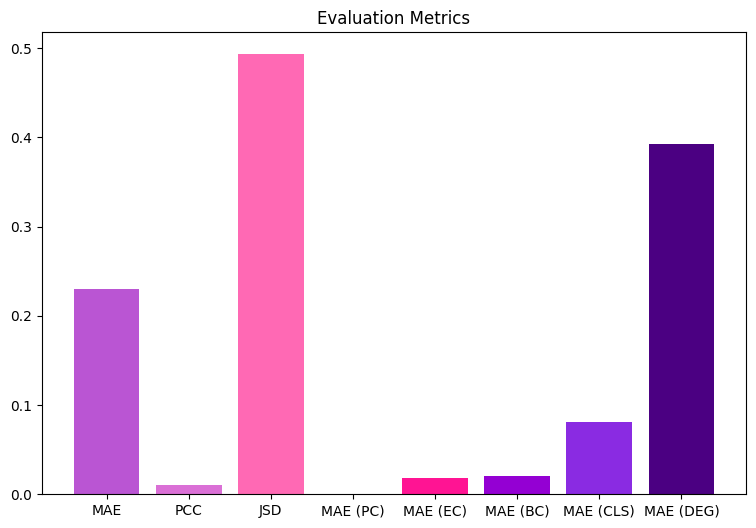

Fold 2:
Denoiser model total trainable parameters: 21057409


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0, train_loss: 0.7255, val_loss: 0.4931
Epoch 1, train_loss: 0.3424, val_loss: 0.3255
Epoch 2, train_loss: 0.3188, val_loss: 0.3219
Epoch 3, train_loss: 0.2434, val_loss: 0.3823
Epoch 4, train_loss: 0.3107, val_loss: 0.4433
Epoch 5, train_loss: 0.2974, val_loss: 0.3104
Epoch 6, train_loss: 0.2238, val_loss: 0.3968
Epoch 7, train_loss: 0.2768, val_loss: 0.3173
Epoch 8, train_loss: 0.2555, val_loss: 0.3316
Epoch 9, train_loss: 0.2141, val_loss: 0.2220
Epoch 10, train_loss: 0.2442, val_loss: 0.1836
Epoch 11, train_loss: 0.2632, val_loss: 0.2485
Epoch 12, train_loss: 0.2389, val_loss: 0.2456
Epoch 13, train_loss: 0.2251, val_loss: 0.2482
Epoch 14, train_loss: 0.2337, val_loss: 0.2177
Epoch 15, train_loss: 0.2668, val_loss: 0.2207
Early stopping triggered after 15 epochs.



100%|██████████| 100/100 [00:15<00:00,  6.35it/s]


100%|██████████| 100/100 [00:10<00:00,  9.58it/s]


Processing samples:   0%|          | 0/56 [00:00<?, ?it/s]

Overall MAE: 0.2239013910293579
Pearson Correlation Coefficient (PCC): 0.0719685
Jensen-Shannon Distance: 0.4810987234772244
Average MAE Betweenness Centrality: 0.021010477833860182
Average MAE Eigenvector Centrality: 0.01778035948404567
Average MAE PageRank Centrality: 0.0007369795439247883
Average Clustering MAE: 0.09260114792132579
Average Degree MAE: 0.4276372601279318


  0%|          | 0/112 [00:00<?, ?it/s]

















































































































torch.Size([1, 1, 268, 268])
Generated 112 predictions
Creating File at results/DDPM/predictions_fold_2.csv...
Done!


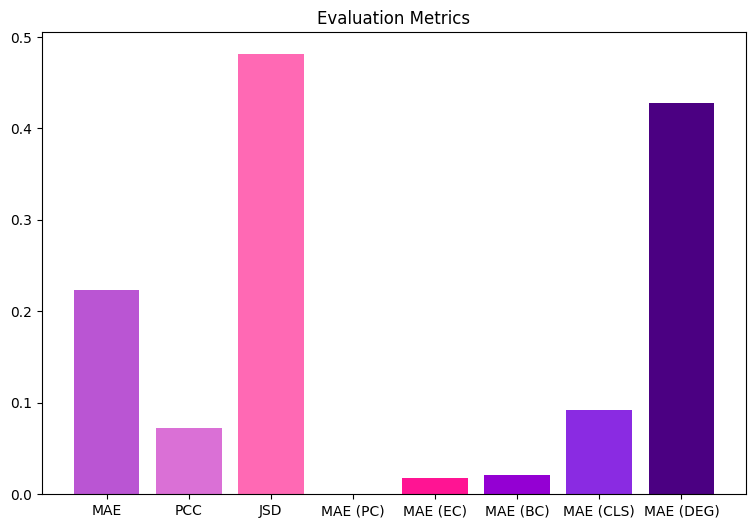

Fold 3:
Denoiser model total trainable parameters: 21057409


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0, train_loss: 0.7727, val_loss: 0.5273
Epoch 1, train_loss: 0.3898, val_loss: 0.3967
Epoch 2, train_loss: 0.3009, val_loss: 0.3210
Epoch 3, train_loss: 0.2672, val_loss: 0.3037
Epoch 4, train_loss: 0.2760, val_loss: 0.2706
Epoch 5, train_loss: 0.2296, val_loss: 0.2647
Epoch 6, train_loss: 0.2808, val_loss: 0.2957
Epoch 7, train_loss: 0.2495, val_loss: 0.2057
Epoch 8, train_loss: 0.2549, val_loss: 0.2607
Epoch 9, train_loss: 0.2199, val_loss: 0.2248
Epoch 10, train_loss: 0.2291, val_loss: 0.2693
Epoch 11, train_loss: 0.2468, val_loss: 0.1816
Epoch 12, train_loss: 0.2392, val_loss: 0.2366
Epoch 13, train_loss: 0.2380, val_loss: 0.2445
Epoch 14, train_loss: 0.2338, val_loss: 0.1633
Epoch 15, train_loss: 0.2192, val_loss: 0.1874
Epoch 16, train_loss: 0.2294, val_loss: 0.2436
Epoch 17, train_loss: 0.2459, val_loss: 0.1845
Epoch 18, train_loss: 0.2029, val_loss: 0.2516
Epoch 19, train_loss: 0.1737, val_loss: 0.2302
Early stopping triggered after 19 epochs.



100%|██████████| 100/100 [00:16<00:00,  5.97it/s]


100%|██████████| 100/100 [00:09<00:00, 10.19it/s]


Processing samples:   0%|          | 0/55 [00:00<?, ?it/s]

Overall MAE: 0.2027694284915924
Pearson Correlation Coefficient (PCC): 0.26581866
Jensen-Shannon Distance: 0.4532458867582345
Average MAE Betweenness Centrality: 0.02034764812111079
Average MAE Eigenvector Centrality: 0.014524153756498605
Average MAE PageRank Centrality: 0.0006097989650517
Average Clustering MAE: 0.04978377349846512
Average Degree MAE: 0.30563229308005424


  0%|          | 0/112 [00:00<?, ?it/s]

















































































































torch.Size([1, 1, 268, 268])
Generated 112 predictions
Creating File at results/DDPM/predictions_fold_3.csv...
Done!


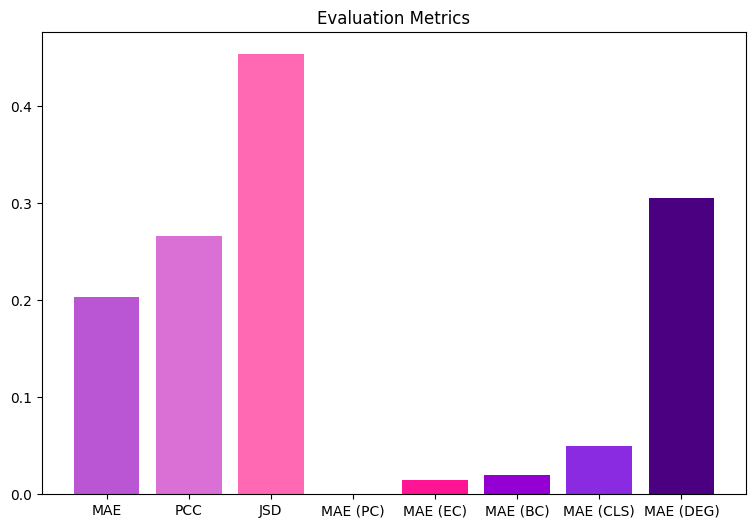

Results saved to results/DDPM/metrics.csv


In [5]:
metrics_by_fold, run_history = run_kfold(DDPM_model, unet_model, n_feat, patience, n_epoch, lr, device, dataset, test_lr_tensors, k=3, seed=random_seed, plot=True, save=save)

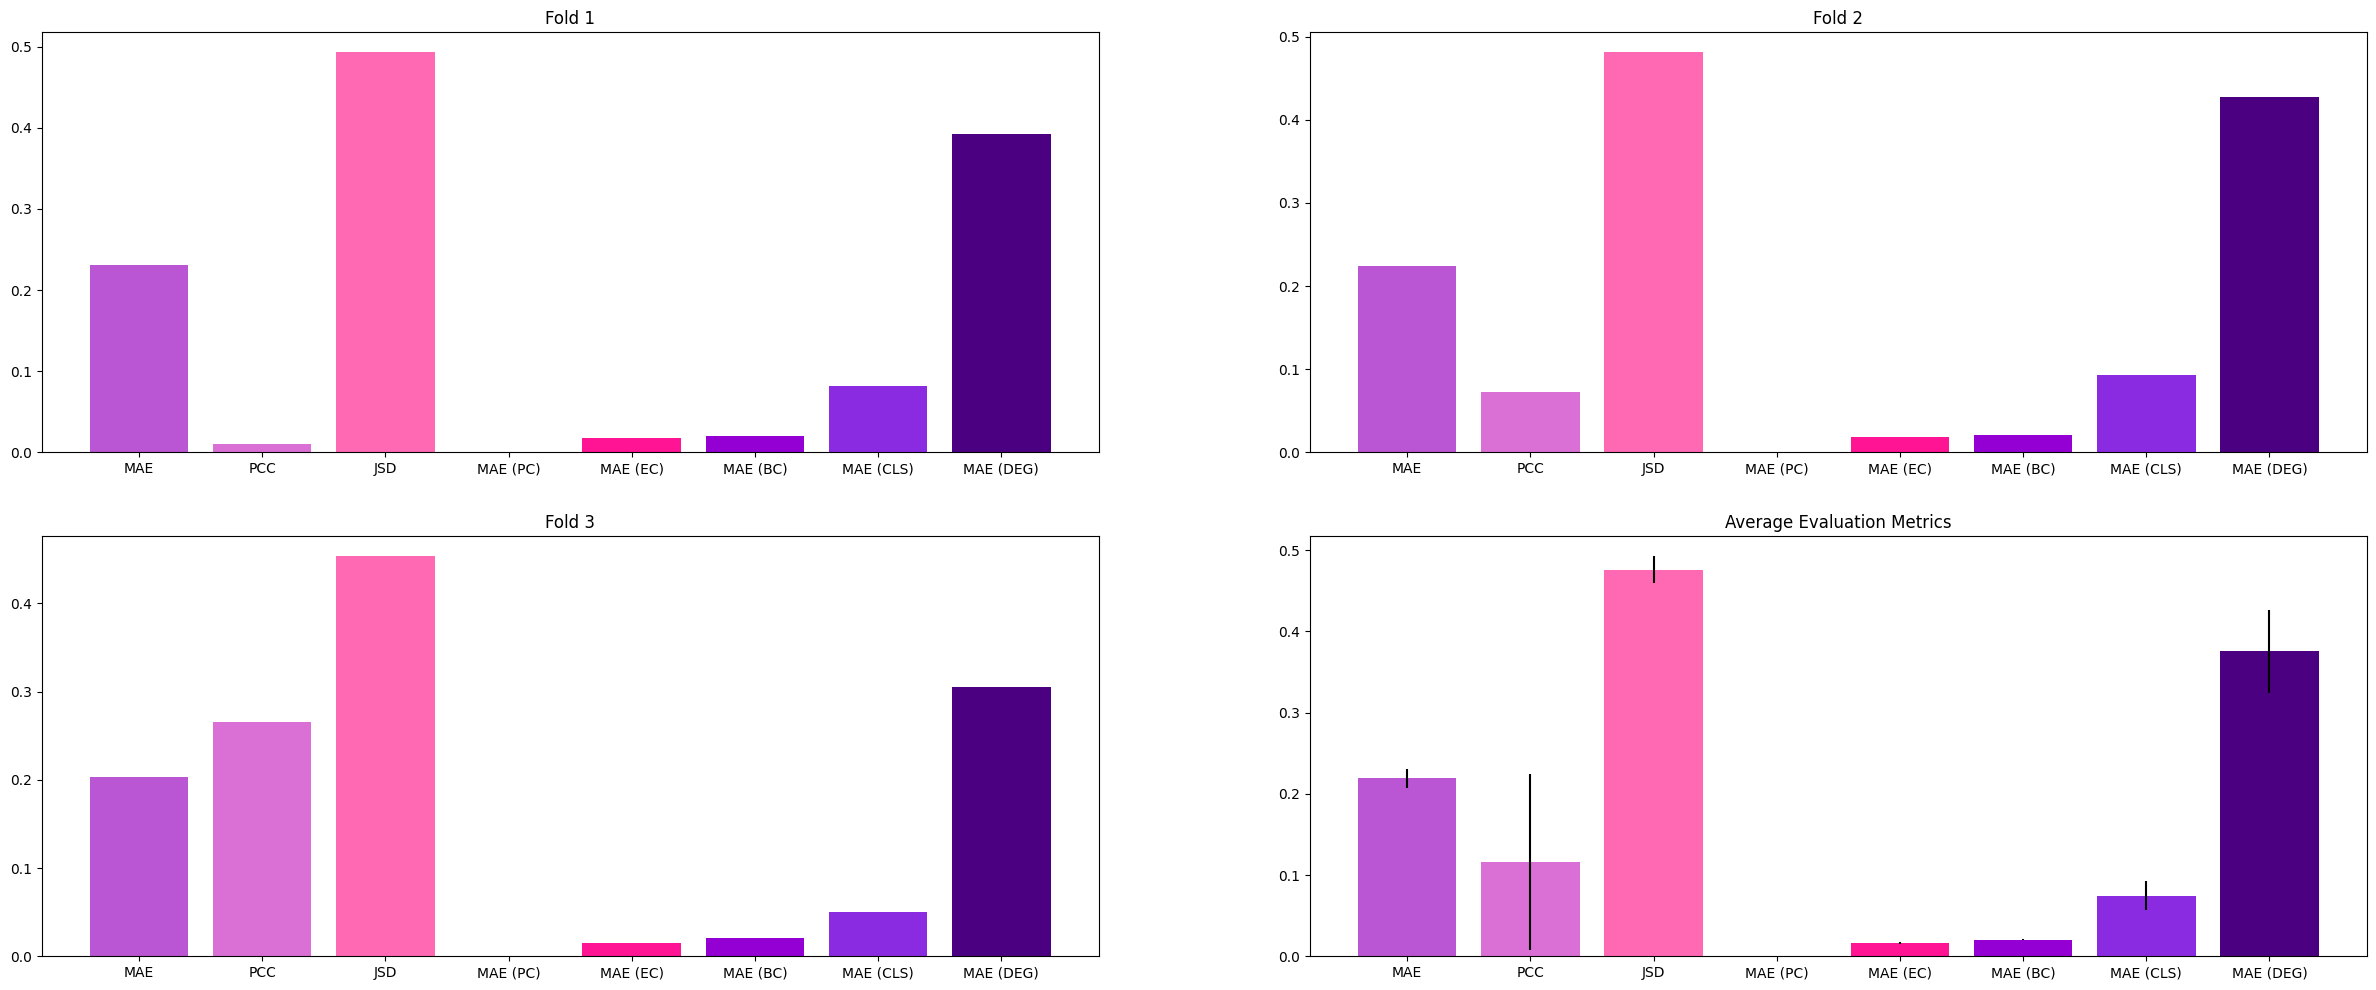

In [8]:
plot_metrics(metrics_by_fold, k=3)

In [9]:
for run_id, run_data in run_history.items():
    # Combine the training and evaluation metrics
    usage_data = run_data.get("system_usage", [])
    eval_data = run_data.get("system_usage_eval", [])
    time = run_data.get("time")
    combined_data = usage_data + eval_data

    # Calculate the maximum RAM_MB and VRAM_MB
    max_ram = max(entry["RAM_MB"] for entry in combined_data if "RAM_MB" in entry)
    max_vram = max(entry["VRAM_MB"] for entry in combined_data if "VRAM_MB" in entry)
    
    print(f"Run {run_id}: Max RAM = {max_ram} MB, Max VRAM = {max_vram} MB, Time = {time:.3f} sec")

Run 0: Max RAM = 1328.12109375 MB, Max VRAM = 16756.5 MB, Time = 166.199 sec
Run 1: Max RAM = 1419.1015625 MB, Max VRAM = 16758.5 MB, Time = 161.476 sec
Run 2: Max RAM = 1438.71875 MB, Max VRAM = 16758.5 MB, Time = 169.020 sec
